## Problem Statement
The aim of this project is to build a sentiment analysis model for Amazon reviews, focusing on transforming raw text files into a tabular format and then developing machine learning models to predict the sentiment of the reviews. The sentiment will be categorized as either positive or negative based on the given rating.

### Mount Google Drive and Unzip the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/txt_reviews.zip' -d '/content/drive/MyDrive'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/txt_reviews/review_203741.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203742.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203743.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203744.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203745.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203746.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203747.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203748.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203749.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_20375.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203750.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203751.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203752.txt  
  inflating: /content/drive/MyDrive/txt_reviews/review_203753.txt 

### Read and Parse Text Files into a DataFrame

In [ ]:
import pandas as pd


In [ ]:
import os

In [ ]:
folder_path = '/content/drive/MyDrive/txt_reviews'
files = os.listdir(folder_path)
all_data = []

for file_name in files:
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data_dict = {}
            for line in lines:
                key, value = line.strip().split(':', 1)
                data_dict[key.strip()] = value.strip()
            all_data.append(data_dict)

# Convert list of dictionaries to DataFrame
combined_df = pd.DataFrame(all_data)

# Save the combined DataFrame as a .csv file
csv_file_path = '/content/drive/MyDrive/combined_files.csv'
combined_df.to_csv(csv_file_path, index=False)

print("Conversion complete. CSV file saved at:", csv_file_path)

In [ ]:
csv_file_path = 'combined_files.csv'


### Load and Display the DataFrame

In [ ]:
df=pd.read_csv(csv_file_path)

In [ ]:
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0.0,1.0,1.0,1.331165e+09,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2.0,5.0,2.0,1.332374e+09,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0.0,1.0,4.0,1.337472e+09,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...
120267,B001EO5S6M,AB345NP127ZU6,"D. Palmer ""Princess Di""",0.0,1.0,2.0,1.273709e+09,Not what i expected,"These were not horrible but not good either ,t..."
120268,B001EO5S6M,A3P3W5R0XLB0MC,J. Valentine,0.0,1.0,1.0,1.270339e+09,Find other options,"I am on a gluten-free diet, and generally I li..."
120269,B000G6STC4,AUSE62ROJBKXO,~Ant,0.0,0.0,5.0,1.346630e+09,LOVE THIS HOT SAUCE,I purchased this Hot Sauce while on a trip to ...
120270,B001EO5S6M,A25ETVRL1LE4LN,B. Wood,0.0,1.0,1.0,1.260490e+09,Foul tasting!,While I have been a big fan of Glutino product...


In [ ]:
pd.set_option('display.max_colwidth',None)

In [ ]:
df[['ReviewText']]

,ReviewText
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.
2,"I fed this to my Golden Retriever and he hated it. He wouldn't eat it, and when he did, it gave him terrible diarrhea. We will not be buying this again. It's also super expensive."
3,"I have to admit, I was a sucker for the large quantity, 12 oz, when shopping for hot sauces ...but now seeing the size of the bottle, it reminds of wing-sauce bottle sizes. Plastic bottle. It does have a convenient squirt top. But overall, not very hot or tasty, and made mostly from jalape&ntilde;os. If I had seen the ingredients list I would not have bought it:<br />Jalapenos<br />Water<br />Vinegar<br />Brown Sugar<br />Lime Juice<br />Fish Sauce<br />Cilantro<br />Habanero<br />Garlic<br />Spice Blend<br />Salt<br />Potassium Sorbate<br />Xanthan Gum"
4,"We have a 7 week old... He had gas and constipation problems for the first 5 weeks. We tried two different kinds of similac including for fussiness and gas and neither seemed to work. We switched to the organic a few weeks ago and saw quick improvement. I wish I could breast feed but I'm unable to, so for now this seems the best option especially since it was recommended we stick with a ready made formula for the gas problems.<br />Ive read a lot of the reviews and took into consideration the information about sucrose. I plan on talking to the pediatrician and my midwife for additional information beyond the article written about it, especially since that is from 2008. I realize the concern and I am doing research on making my own formula so I know exactly whats in it and that its organic, but in the mean time baby L eats great with this, is healthy, and has fewer stomach problems. It's middle of the road when it comes to $ - although Amazn is one of the more expensive places!!! Target has the best price. So for now it works and I recommend it!!"
...,...
120267,"These were not horrible but not good either ,t hey tasted more like plain fig newtons. They do not taste anything like blueberry or a nutrigrain bar. If your not big on plain fig newtons then dont buy these ."
120268,"I am on a gluten-free diet, and generally I like Glutino brand foods. However, these breakfast bars are truly horrible. I even passed them out to 4 other co-workers who after a few seconds of chewing spit them out. If this is my only option for a breakfast bar, then I will just have to find something else to eat. Yuck!"
120269,"I purchased this Hot Sauce while on a trip to South Dakota.<br />Since finishing it I have not been able to find it in any store on the East Coat.<br />I was so excited to find this listed on Amazon.<br /><br />I like HOT things. Although I won't do Ghost Chili Hot.<br />I really enjoy it because it is hot enough for me but not too much.<br />It has great taste as well. Not too vinegary as some other hot sauces are.<br /><br />For the size of the bottle, this is a pretty decent price too.<br />Was received in a timely manner too.<br />Will be re-purchasing when this bottle runs out."
120270,"While I have been a big fan of Glutino products, they failed miserably with this item. The chocolate ones are even worse tasting. Not even dunked in coffee makes them palitable. These were by far the most DISCUSTING foul tasting GF product I have ever tried. I could not get rid of the horrible aftertaste that was inbedded into my tongue. Gross. Even if they tasted good they would be way over priced. Save your money and avoid these!"


### Build a Model

###  Task A - Data Preprocessing

#### Remove Duplicates and Handle Missing Values

In [ ]:
df[df.duplicated()]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
3076,B0061PPLYI,AYQ8RLE0K6RU8,"M. Brown ""TankerToys.com""",0.0,1.0,4.0,1.187914e+09,3.5 out of 4 Paws,"First Impression: Man it was time for a new Nylabone. Mom and Dad bought me my first two almost 5 months ago! They were looking a little nasty, but I still loved them. The kind folks over at Nylabone sent me a gift box and I got to try out this new monster of a chew bone. Now it is shaped a little weird, but I like it none the less. Every time Mom and Dad eat lunch or dinner I lay down and chew on a Nylabone. It keeps me entertained while they eat that amazing smelling human food... I just close my eyes and pretend.<br /><br />Conclusion: Great chew bone! Lasts a very long time. Not sure what could be improved."
3868,B00317Y3HK,ARIGM9KNMLQNW,Jajinwilmington,0.0,0.0,5.0,1.320883e+09,Pups Delight,I have been buying this food locally but began to have a hard time fInding it. I searched online and it was a little more cost effective. My pups seem to love this food.
7608,B003185UA8,ARIGM9KNMLQNW,Jajinwilmington,0.0,0.0,5.0,1.320883e+09,Pups Delight,I have been buying this food locally but began to have a hard time fInding it. I searched online and it was a little more cost effective. My pups seem to love this food.
9475,B0030VBQGS,A20P8VC55KPPCT,FL Mom,0.0,0.0,5.0,1.310861e+09,Love all HappyBaby Tots!,"My kids (18 mo and 3 yrs) love the HappyBaby Tots. We have tried every flavor and they eat all of them. I love that they are getting good, organic nutrition, and that the ingredients are wholesome. They are very convenient to throw in your diaper bag or purse on-the-go, or to stick in a lunch box for a snack. We use a spoon and sometimes a bowl at home for self feeding with my little one, but you can also give the pouch to them to eat directly from the squeeze pouch. Thank you, HappyBaby, for such great products!!"
10762,B0030VJ97Q,A2MF0C4E7GYCI,"VW ""VW""",0.0,0.0,5.0,1.305331e+09,My son loves this,"My son loves this food. He is 16 months now and I still use them. Not all the time, but often. The reason is that his molars are coming in very quickly and he is in a lot of pain. He won't eat much when he's in pain, but these are easy on his gums. They are organic and a quick meal. My son is strong and a very healthy weight. I make sure he gets as much organic, wholesome food as possible. Buying these subscribe and save is a great way to give him good food and still save money. He loves the whole line."
...,...,...,...,...,...,...,...,...,...
116957,B001BORBHO,AMQ1MEG334SAP,Bigmac,0.0,3.0,1.0,1.332893e+09,My Dog Wouldn't Touch this with a Ten Foot Pole!,"My dog seems to be allergic to poultry so we thought we would switch him to this lamb-based formula. Usually he is a good eater, but my dog had one smell of this stuff and wouldn't come back. I understand Wellness puts higher-end ingredients in their food but if a dog doesn't like it there goes your money right down the drain."
118384,B000MXGMHA,AO29VDV2AUM6W,Desiree Calora,0.0,0.0,5.0,1.319069e+09,Great baby food,"This is great for your little one, no artificial flavors or additives. But I found out after buying the stage 1, that stage 2 is cheaper & you get more."
118385,B000MXGMHA,AO29VDV2AUM6W,Desiree Calora,0.0,0.0,5.0,1.319069e+09,Great baby food,"This is great for your little one, no artificial flavors or additives. But I found out after buying the stage 1, that stage 2 is cheaper & you get more."
119170,B003D4IYSU,A38O27BDP2QECS,"Erik R. Swierk ""Mr Busy Busy""",0.0,0.0,4.0,1.341792e+09,Stash Tea at it's best,"I'm a fan of all kinds of teas so it's easy to give them a thumbs up. The single pouches are what I use to take with me to work or camping which cuts down on space AND lets me share with others easier. Great product at home or on the go for sure. They do have strings, staples and paper tags which is why I only gave it a 4 star. Eliminate those wasteful parts and 

In [ ]:

 df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.isnull().sum()

ProductId                 1
UserId                    1
ProfileName               8
HelpfulnessNumerator      1
HelpfulnessDenominator    1
Score                     1
Time                      1
ReviewSummary             7
ReviewText                1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Score'].value_counts(normalize=True)

Score
5.0    0.639773
4.0    0.144365
1.0    0.089610
3.0    0.075632
2.0    0.050621
Name: proportion, dtype: float64

####  Create Sentiment Column

In [ ]:
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    else:
        return 'Negative'

df['Sentiment'] = df['Score'].apply(classify_sentiment)

In [ ]:


df['Sentiment'] = df.Sentiment.map({'Positive':1, 'Negative':0})

In [ ]:
df['Sentiment'].value_counts(normalize=True)

Sentiment
1    0.784138
0    0.215862
Name: proportion, dtype: float64

#### Visualize Data with Word Cloud

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


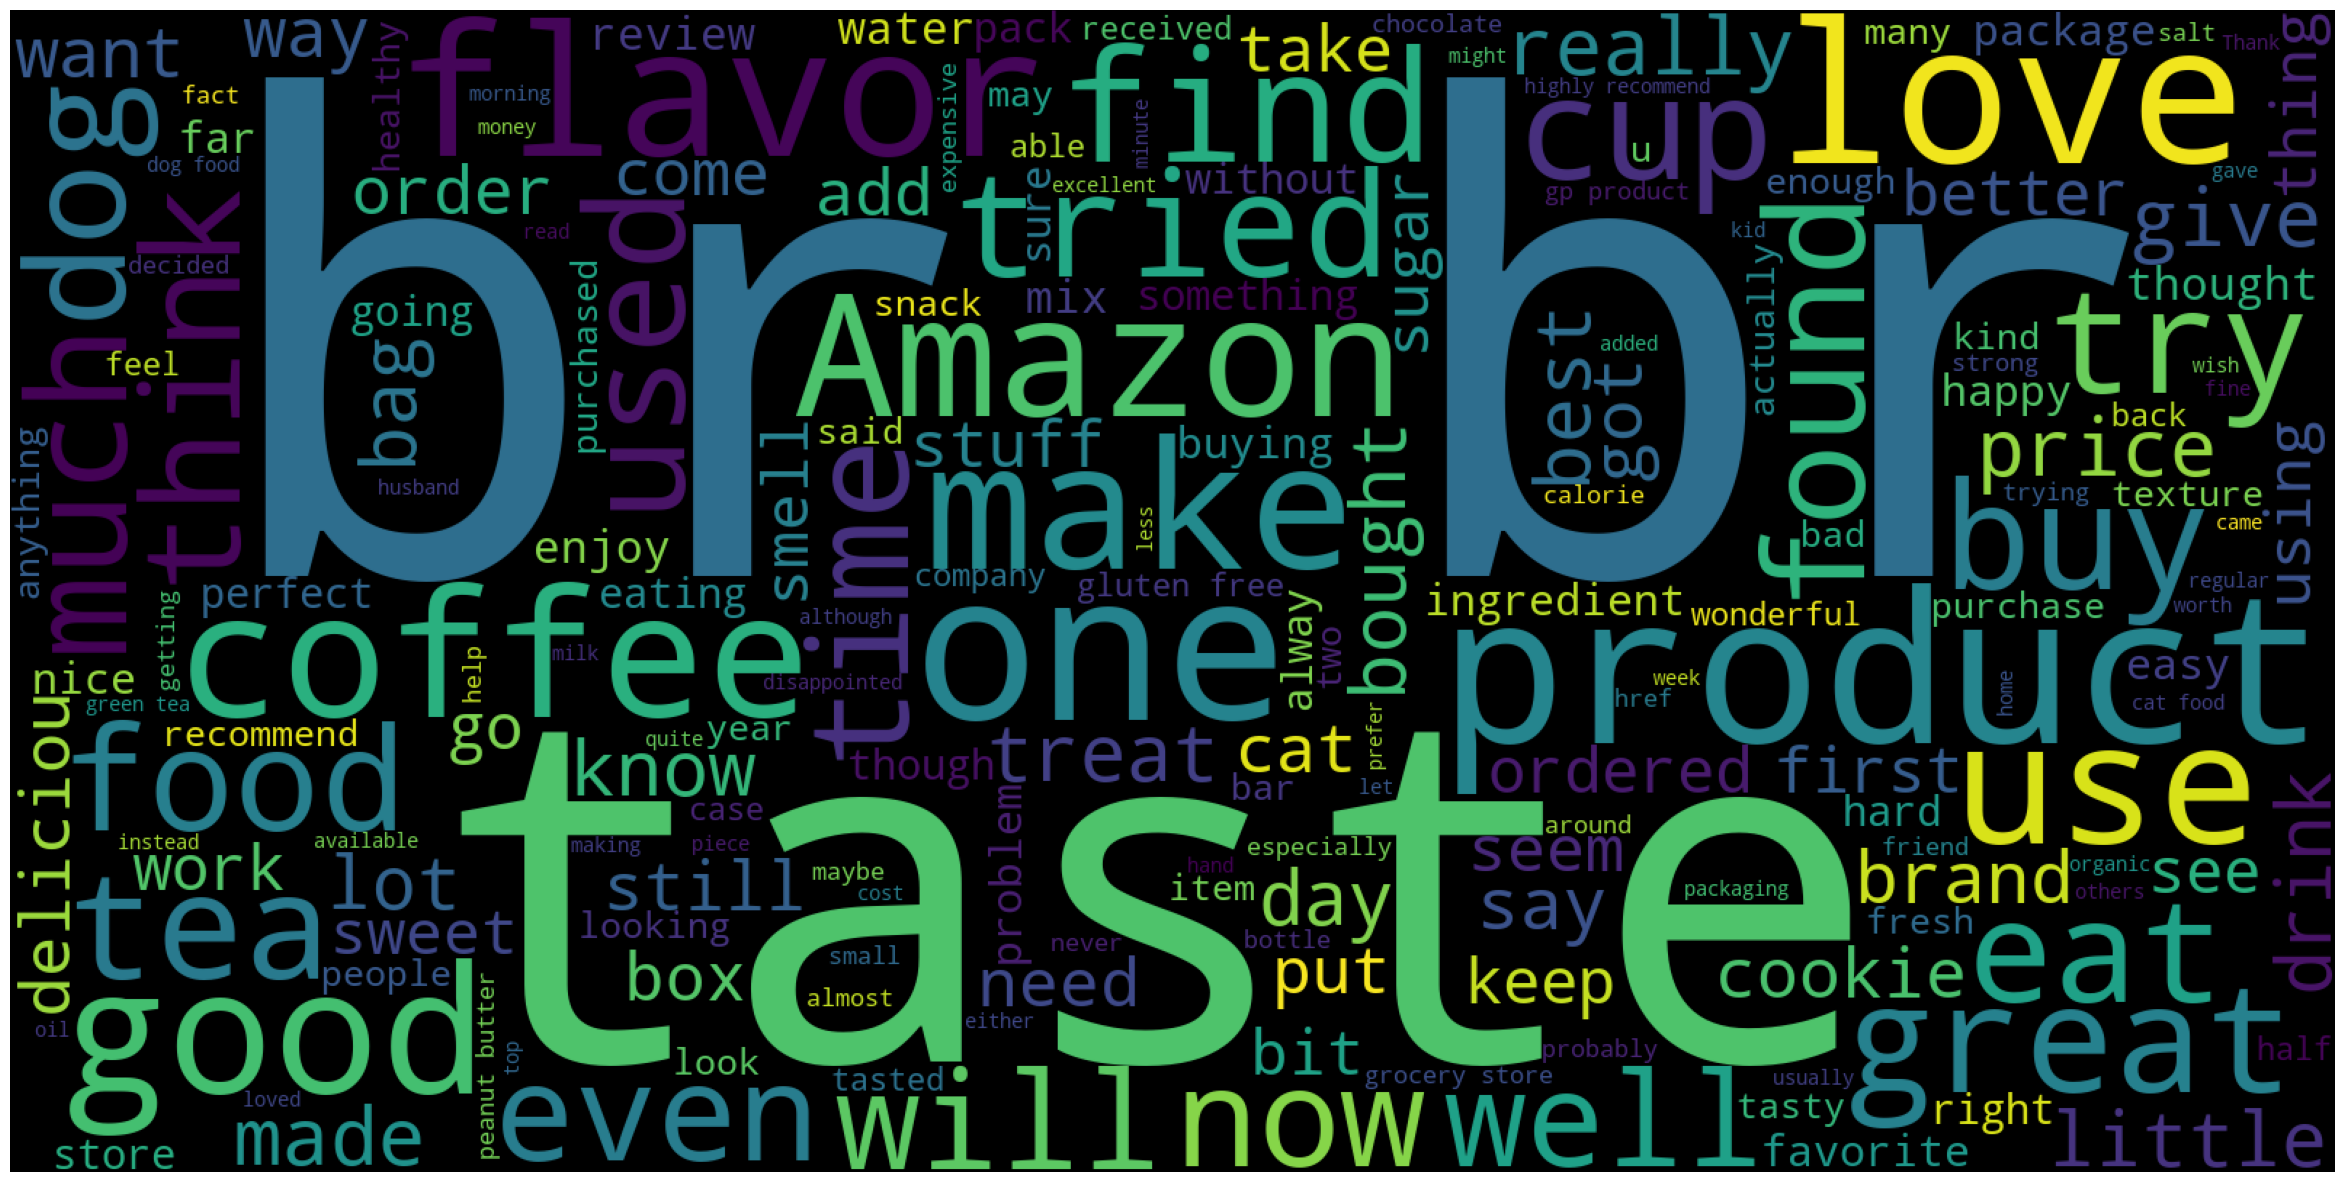

In [ ]:

display_wordcloud(df['ReviewText'])

#### Sample Data for Training

In [ ]:
df_new = df.sample(frac=0.6, random_state=42)

In [ ]:
df_new.shape

(72113, 10)

#### Split Data into Train and Test Sets

In [ ]:
X=df_new['ReviewText']
y=df_new['Sentiment']

In [ ]:

X.shape

(72113,)

In [ ]:
y.shape


(72113,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=25)

In [ ]:


X_train.shape

(57690,)

In [ ]:
X_test.shape

(14423,)

#### Text Preprocessing

In [ ]:
import string
! pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\FOUZIA
[nltk_data]     KOUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\FOUZIA
[nltk_data]     KOUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess(review):
    # Removing special characters and digits
    review = re.sub("[^a-zA-Z]", " ", review)

    # change text to lower case
    review = review.lower()

    # tokenize into words
    review=review.split()

    # remove stop words
    review= [word for word in review if word not in stopwords.words("english")]
    review= [word for word in review if word not in ['more']]
    review= [word for word in review if not re.search(r'read[a-z]*', word)]

    # Stemming/Lemmatization
    wl=WordNetLemmatizer()
    review=[wl.lemmatize(word,pos='v') for word in review ]
    review=' '.join(review)
    return review

In [ ]:
X_train= X_train.apply(preprocess)

In [ ]:
X_train

35176                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     crappy deal get box capri sun kroger yup box count
9120                                                                                                                                                                                                                                                                                                                                                                                                                                                strong coffee best way clean powerful d

In [ ]:
X_test = X_test.apply(preprocess)

In [ ]:
X_test

86601                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     know usually like chew head mine first really stand look eat know ones sell amazon fresh enough get clean teeth cut imagine thick green apple gumminese intense flavor float top soft white pillow mashmallow glad get next da

In [ ]:


y_train

35176    0
9120     1
23194    0
60205    1
48047    1
        ..
20054    0
94765    1
57746    0
14133    1
73328    1
Name: Sentiment, Length: 57690, dtype: int64

#### Task B - Build and Evaluate Models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import joblib

# Define Vectorizers and Classifiers
vectorizers = {
    'tfidf': TfidfVectorizer()
}

classifiers = {
    'decision_tree': DecisionTreeClassifier(),
    'logistic_regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'svm': SVC()  # Support Vector Machine classifier
}

results = {}

# Train and Evaluate Each Model
for clf_name, classifier in classifiers.items():
    for vec_name, vectorizer in vectorizers.items():
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        classifier.fit(X_train_vec, y_train)
        y_pred = classifier.predict(X_test_vec)

        report = classification_report(y_test, y_pred)
        f1_sc = f1_score(y_test, y_pred)

        results[f'{clf_name}_{vec_name}'] = {
            'classification_report': report,
            'f1_score': f1_sc
        }

# Print or store the results as needed
for key, value in results.items():
    print(f"Results for {key}:")
    print(value['classification_report'])
    print(f"F1 Score: {value['f1_score']}\n")

Results for decision_tree_tfidf:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      3127
           1       0.88      0.89      0.88     11296

    accuracy                           0.81     14423
   macro avg       0.73      0.72      0.72     14423
weighted avg       0.81      0.81      0.81     14423

F1 Score: 0.8817697087207509

Results for logistic_regression_tfidf:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      3127
           1       0.89      0.97      0.93     11296

    accuracy                           0.88     14423
   macro avg       0.86      0.77      0.80     14423
weighted avg       0.88      0.88      0.87     14423

F1 Score: 0.9271985031467936

Results for random_forest_tfidf:
              precision    recall  f1-score   support

           0       0.94      0.33      0.49      3127
           1       0.84      0.99      0.91     11296

    accuracy     

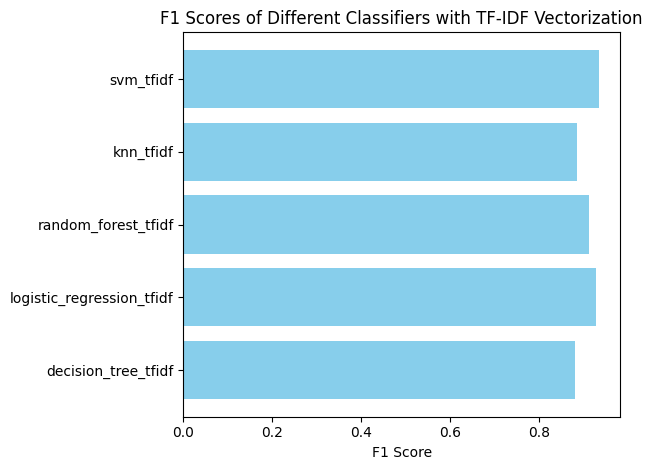

In [ ]:
# Plot F1 Scores
import matplotlib.pyplot as plt
import numpy as np

# Plotting the F1 scores
labels = results.keys()
f1_scores = [results[key]['f1_score'] for key in labels]

fig, ax = plt.subplots()
ax.barh(labels, f1_scores, color='skyblue')

ax.set_xlabel('F1 Score')
ax.set_title('F1 Scores of Different Classifiers with TF-IDF Vectorization')

plt.tight_layout()
plt.show()

## Observations:

### Models Performance:

1.Decision Tree Classifier with TF-IDF

Accuracy Score: 0.81
Precision/Recall:
Positive Sentiment: Precision (0.88), Recall (0.89)
Negative Sentiment: Precision (0.57), Recall (0.55)
The decision tree model performs moderately well but has lower precision and recall for negative sentiments.

2.Logistic Regression with TF-IDF

Accuracy Score: 0.88
Precision/Recall:
Positive Sentiment: Precision (0.89), Recall (0.97)
Negative Sentiment: Precision (0.82), Recall (0.58)
The logistic regression model shows high accuracy and balanced performance across both positive and negative sentiments, making it a strong candidate.

3.Random Forest Classifier with TF-IDF

Accuracy Score: 0.85
Precision/Recall:
Positive Sentiment: Precision (0.84), Recall (0.99)
Negative Sentiment: Precision (0.94), Recall (0.33)
The random forest model has excellent precision for negative sentiments but lower recall, indicating it struggles to identify all relevant negative reviews.

4.K-Nearest Neighbors (KNN) with TF-IDF

Accuracy Score: 0.81
Precision/Recall:
Positive Sentiment: Precision (0.82), Recall (0.96)
Negative Sentiment: Precision (0.64), Recall (0.24)
The KNN model has the lowest precision and recall for negative sentiments, making it less effective for identifying negative reviews.

5.Support Vector Machine (SVM) with TF-IDF

Accuracy Score: 0.89
Precision/Recall:
Positive Sentiment: Precision (0.90), Recall (0.97)
Negative Sentiment: Precision (0.85), Recall (0.63)
The SVM model shows the highest accuracy and balanced performance across both positive and negative sentiments, similar to logistic regression.


## Recommended Model for Future Predictions
The Logistic Regression and Support Vector Machine (SVM) models are the most suitable for future predictions due to their high accuracy, balanced precision, and recall for both positive and negative sentiments. They are also relatively lightweight and fast, meeting the client's requirements for low latency and efficient deployment.

## Conclusion
This project successfully demonstrated the transformation of raw text data into a structured format and the development of robust sentiment analysis models. The recommended models, Logistic Regression and SVM, provide high accuracy and balanced performance, making them suitable for deployment in real-time environments. The insights gained from this project can significantly enhance customer understanding and support strategic business decisions, making sentiment analysis a valuable tool for businesses.






